In [123]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
np.random.seed(3) # random number generation, seed to make sure the same random numbers are generated.

In [124]:
path = "data/tvmarketing.csv"
marketData = pd.read_csv(path)
# print(marketData)
print(marketData.head()) # top 5 datas

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


<Axes: xlabel='TV', ylabel='Sales'>

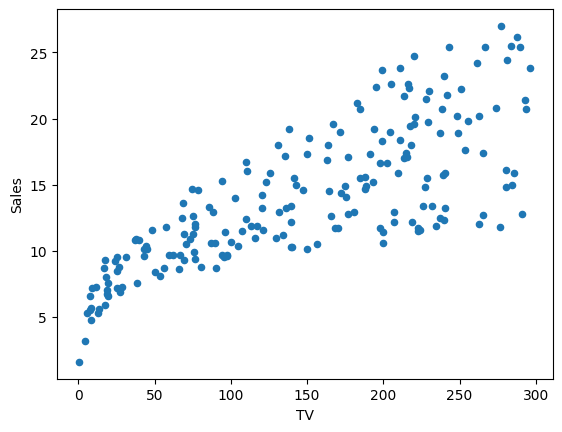

In [125]:
marketData.plot(x='TV', y='Sales', kind='scatter')

<Axes: xlabel='TV', ylabel='Sales'>

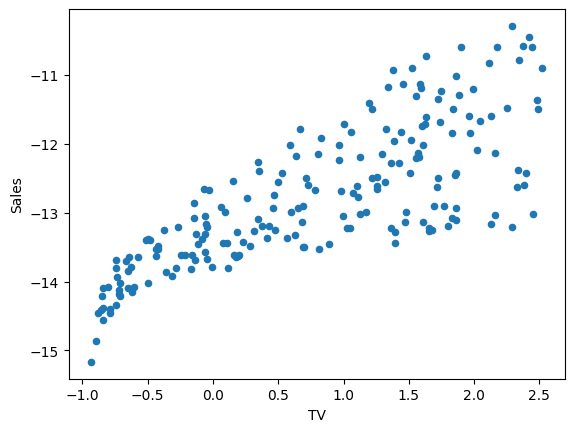

In [126]:
# Column wise normalization 
# if we see TV it ranges from 0 to 300 but sales from just 0 to 25, variation is large, hence we do normalization to make algo efficient.
market_data_norm = (marketData - np.mean(marketData))/np.std(marketData)
market_data_norm.plot(x='TV', y='Sales', kind='scatter')

In [127]:
X_norm = market_data_norm['TV']
Y_norm = market_data_norm['Sales']
print(X_norm.shape, Y_norm.shape)

X_norm = np.array(X_norm).reshape((1, len(X_norm)))
Y_norm = np.array(Y_norm).reshape((1, len(Y_norm)))

print ('The shape of X_norm: ' + str(X_norm.shape))
print ('The shape of Y_norm: ' + str(Y_norm.shape))
print ('I have m = %d training examples!' % (X_norm.shape[1]))

(200,) (200,)
The shape of X_norm: (1, 200)
The shape of Y_norm: (1, 200)
I have m = 200 training examples!


In [128]:
def layer_sizes(X,Y):
    """
    X = input data shape
    Y = labels of shape
    returns:
    n_x = size of input layer
    n_y = size of output layer
    """
    n_x = X.shape[0]
    n_y = Y.shape[0]
    return (n_x, n_y)

(n_x, n_y) = layer_sizes(X_norm, Y_norm)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 1
The size of the output layer is: n_y = 1


In [129]:
def initialize_parameters(n_x, n_y):
    """
    Returns:
    params -- python dictionary containing your parameters:
                    W -- weight matrix of shape (n_y, n_x)
                    b -- bias value set as a vector of shape (n_y, 1)
    """
    
    W = np.random.randn(n_y, n_x) * 0.01
    b = np.zeros((n_y, 1))
    
    parameters = {"W": W,
                  "b": b}
    
    return parameters

parameters = initialize_parameters(n_x, n_y)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[0.01788628]]
b = [[0.]]


In [130]:
def forward_propagation(X,parameters):
    """
    X = input params of size(n_x, m)
    returns y hat i.e predicted output
    """
    W = parameters["W"]
    b = parameters["b"]
    
    # to calculate predicted_output = wx + b
    z = np.matmul(W,X) + b
    y_hat = z
    return y_hat


y_hat = forward_propagation(X_norm, parameters)
print("Some elements of output vector Y_hat:", y_hat, y_hat[0, 0:5])
    
    

Some elements of output vector Y_hat: [[ 3.12380636e-02 -7.52560233e-03 -1.32273700e-02  1.48219852e-02
   2.09414648e-02 -1.50026457e-02 -4.81047487e-03  8.28479374e-03
  -1.50235312e-02  2.49097281e-02 -3.01431362e-03  2.80216818e-02
  -1.18489207e-02  3.54376348e-03  2.58078087e-02  2.39907618e-02
  -2.65925849e-03  4.19523743e-02 -2.36686015e-03  1.39447902e-02
   2.87944489e-02  3.27627121e-02 -1.40627938e-02  3.08621229e-02
  -3.80796627e-03  3.80885390e-02  1.30258240e-02  3.33266232e-02
   3.51436700e-02 -2.07446181e-03  4.43542178e-02  6.76014524e-03
   3.48110669e-03  3.86524501e-02  3.16782275e-03  4.38947347e-02
   3.89239629e-02 -1.21815238e-03 -7.81800067e-03  3.07994661e-02
   2.54736391e-02  2.01478122e-02  4.45004170e-02  2.63926054e-02
  -1.15774079e-02  1.97509859e-02  1.91468700e-03  3.32848520e-02
   3.06323813e-02 -2.84722886e-03  2.49097281e-02  4.14944576e-03
   2.83767370e-02  2.13174056e-02  3.80467679e-02  2.47217577e-02
  -1.52950440e-02  1.16264891e-02  2.7

In [131]:
def compute_cost(predicted_y, actual_y):
    """
    It calculates mean squared error to get the value of w & b parameters
    """
    m = predicted_y.shape[1]
    cost = np.sum((predicted_y -actual_y) ** 2) / (2*m)
    return cost

print("Cost function is " + str(compute_cost(y_hat, Y_norm)))
    

Cost function is 82.32261313384134


In [132]:
def backward_propagation(predicted_y, X, actual_y):
    """
    Its job is to find gradients/slope/derivatives 
    """
    # print(X.shape[1], X.size)
    size_of_data_set_m = X.size
    difference_in_output = predicted_y - actual_y 
    grad_with_respect_b = 1/size_of_data_set_m * np.sum(difference_in_output, axis=1, keepdims=True)
    grad_with_respect_w = 1/size_of_data_set_m * np.dot(difference_in_output, X.T) # transpose vector
    gradients = { "dW" : grad_with_respect_w, "db" : grad_with_respect_b } 
    return gradients

gradients = backward_propagation(y_hat, X_norm, Y_norm)
print(gradients)

{'dW': array([[9.1714438]]), 'db': array([[12.79347054]])}


In [133]:
def update_parameters(parameters_w_b, gradients_w_b, learning_rate =1.2):
    """
    It is used to update the value of parameter w & b until it converges, gradient descent algorithm
    """
    print(parameters_w_b,gradients_w_b)
    # Parameters retrieval
    W = parameters_w_b["W"]
    b = parameters_w_b["b"]

    # gradients retrieval
    dW = gradients_w_b["dW"]
    db = gradients_w_b["db"]

    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    
    parameters = {"W": W,
                  "b": b}
    
    return parameters

updated_parameters =  update_parameters(parameters,gradients)
print("Updated valued of w & b:",updated_parameters)
    

{'W': array([[0.01788628]]), 'b': array([[0.]])} {'dW': array([[9.1714438]]), 'db': array([[12.79347054]])}
Updated valued of w & b: {'W': array([[-10.98784627]]), 'b': array([[-15.35216465]])}


In [134]:
def nn_model(input_X, output_label_Y, iterations = 10, learning_rate=1.2, print_cost= False):
    
    print("My neural network model:",input_X.shape, output_label_Y.shape, iterations, learning_rate, print_cost)
    neural_nw_layers = layer_sizes(input_X,output_label_Y)
    nn_x = neural_nw_layers[0]
    nn_y = neural_nw_layers[1]
    params = initialize_parameters(nn_x, nn_y)

    for i in range(0,iterations):
        y_hat = forward_propagation(input_X,params)
        cost = compute_cost(y_hat,output_label_Y)
        gradients = backward_propagation(y_hat,input_X,output_label_Y)
        params = update_parameters(parameters, gradients)
        if print_cost: 
            print("Cost is %f %i", cost, i)

    return parameters


In [135]:
paramaters_updated = nn_model(X_norm, Y_norm, 30,1.2,False) 
print(parameters, 'updated' , paramaters_updated)

My neural network model: (1, 200) (1, 200) 30 1.2 False
{'W': array([[0.01788628]]), 'b': array([[0.]])} {'dW': array([[9.14976727]]), 'db': array([[12.7829696]])}
{'W': array([[0.01788628]]), 'b': array([[0.]])} {'dW': array([[-20.34387826]]), 'db': array([[-11.07326396]])}
{'W': array([[0.01788628]]), 'b': array([[0.]])} {'dW': array([[58.62844181]]), 'db': array([[45.04096555]])}
{'W': array([[0.01788628]]), 'b': array([[0.]])} {'dW': array([[-145.59312898]]), 'db': array([[-95.89475526]])}
{'W': array([[0.01788628]]), 'b': array([[0.]])} {'dW': array([[378.63067734]]), 'db': array([[263.55341555]])}
{'W': array([[0.01788628]]), 'b': array([[0.]])} {'dW': array([[-964.85187055]]), 'db': array([[-656.33736586]])}
{'W': array([[0.01788628]]), 'b': array([[0.]])} {'dW': array([[2477.01429317]]), 'db': array([[1699.59679598]])}
{'W': array([[0.01788628]]), 'b': array([[0.]])} {'dW': array([[-6340.01513171]]), 'db': array([[-4335.18844109]])}
{'W': array([[0.01788628]]), 'b': array([[0.]

In [138]:
def predict(X,Y,parameters,X_pred):
    W = parameters["W"]
    b = parameters["b"]
    print(X,isinstance(X,pd.Series), X_pred)
    if(isinstance(X,pd.Series)):
        X_mean = np.mean(X)
        X_std = np.std(X)
        # normalization => bringing within range, (x-mu)/deviation
        X_pred_normalize = ((X_pred- X_mean)/X_std)
        X_pred_norm = X_pred_normalize.reshape((1,len(X_pred)))
        print(X_pred_normalize,X_pred_norm)
    else:
        print('here not understood well')
        X_mean = np.array(np.mean(X)).reshape((len(X.axes[1]),1))
        X_std = np.array(np.std(X)).reshape((len(X.axes[1]),1))
        X_pred_norm = ((X_pred - X_mean)/X_std)
    
    Y_prediction_test_normalize = np.matmul(W,X_pred_norm) + b
    Y_predicition_test = Y_prediction_test_normalize * np.std(Y) + np.mean(Y)
    return Y_predicition_test[0]
        
        
X_test_data = np.array([50, 120, 280])
result = predict(marketData['TV'], marketData['Sales'], paramaters_updated, X_test_data)
print(marketData["Sales"], result)

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64 True [ 50 120 280]
[-1.1331534  -0.31577196  1.55252846] [[-1.1331534  -0.31577196  1.55252846]]
0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64 [13.91701779 13.99310563 14.16702071]


0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64 True [  0.7   0.8   0.9 ... 325.8 325.9 326. ]
[-1.70882347 -1.70765578 -1.70648809 ...  2.08732946  2.08849715
  2.08966483] [[-1.70882347 -1.70765578 -1.70648809 ...  2.08732946  2.08849715
   2.08966483]]


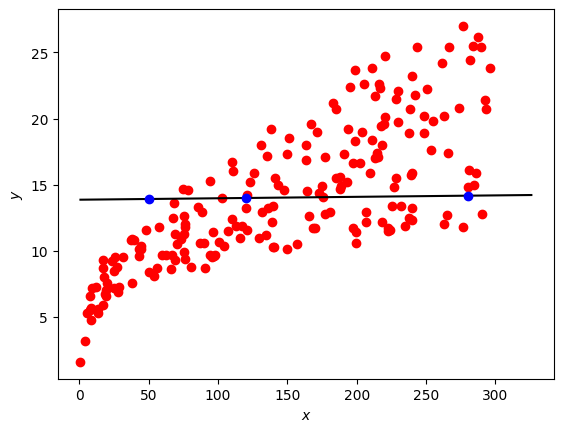

In [137]:
fig, ax = plt.subplots()
plt.scatter(marketData['TV'], marketData['Sales'], color='red')
plt.xlabel('$x$')
plt.ylabel("$y$")

X_line = np.arange(np.min(marketData["TV"]), np.max(marketData["TV"]) * 1.1, 0.1)
Y_line = predict(marketData["TV"], marketData["Sales"], paramaters_updated, X_line)
ax.plot(X_line, Y_line, color="black")
ax.plot(X_test_data,result, "bo")
plt.plot()
plt.show()
